In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ api_key 

In [4]:
print("Beginning Data Retrieval")
print("--------------------------------------")

#Create empty lists for Temperature, Humidity, Cloudiness, Windspeed and Latitude 
#since we need to find the correlation between each with latitude
Temperature = []
Humidity = []
Cloudiness = []
Windspeed = []
Lat = []
Lon = []
foundcities = []

for city in cities:
    params = {'appid' : api_key,
               'q' : city,
               'units' : 'imperial'
            }
    final_url = url + '&q='+str(city)
    print(final_url)
    try:
        response = requests.get(final_url, params=params).json()
        Lat.append(response['coord']['lat'])
        Lon.append(response["coord"]["lon"])
        Temperature.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Windspeed.append(response['wind']['speed'])
        foundcities.append(response['name'])
        print(f"found {city}")
    except KeyError:
        print(f"I did not find {city}")
    continue
print("--------------------------------------")
print("Data Retrieval Complete")
print("--------------------------------------")

Beginning Data Retrieval
--------------------------------------
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=kahului
found kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=mataura
found mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=tiksi
found tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=komsomolskiy
found komsomolskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=swift current
found swift current
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=key west
found key west
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=nome
found nome
http://api.openweathermap.org/data/2.5/weather?

found yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=pokrovsk-uralskiy
I did not find pokrovsk-uralskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=la cruz
found la cruz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=punta arenas
found punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=karkaralinsk
I did not find karkaralinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=vaitupu
I did not find vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=makakilo city
found makakilo city
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=yenagoa
found yenagoa
http://api.openweathermap.or

found arica
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=cherskiy
found cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=tafalla
found tafalla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=asyut
found asyut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=awjilah
found awjilah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=clyde river
found clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=bansang
found bansang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=saleaula
I did not find saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401

I did not find asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=mamaku
found mamaku
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=ramsar
found ramsar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=acapulco
found acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=tasiilaq
found tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=kapit
found kapit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=ribeira grande
found ribeira grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=belushya guba
I did not find belushya guba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6d

found nantucket
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=fare
found fare
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=morros
found morros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=ust-ilimsk
found ust-ilimsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=betanzos
found betanzos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=port pirie
found port pirie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=fortuna
found fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=arlit
found arlit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=bant

found cabedelo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=cockburn town
found cockburn town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=slave lake
found slave lake
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=lavrentiya
found lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=marcona
I did not find marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=waddan
found waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=kavieng
found kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=erenhot
found erenhot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d13

found portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=vega de alatorre
found vega de alatorre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=port hawkesbury
found port hawkesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=tahta
I did not find tahta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=souillac
found souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=vila franca do campo
found vila franca do campo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=matara
found matara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=fairbanks
found fairbanks
http://api.openweathermap.org/data/2.5/we

found storforshei
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=la ronge
found la ronge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=quimperle
found quimperle
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=caravelas
found caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=walvis bay
found walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=miraflores
found miraflores
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=grand gaube
found grand gaube
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=boras
found boras
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b

found petropavlovsk-kamchatskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=sukumo
found sukumo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=rocha
found rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=abu samrah
found abu samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=alice springs
found alice springs
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=trostberg
found trostberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=novouzensk
found novouzensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=cam ranh
found cam ranh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4

found mugur-aksy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=jaranwala
found jaranwala
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=gold coast
found gold coast
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=neuquen
found neuquen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=ereymentau
found ereymentau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=wasilla
found wasilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=mbigou
found mbigou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd932401ec1f&q=camacha
found camacha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=43ea6db4d138b3a3bf0abd9324

In [6]:
Random_Cities = pd.DataFrame({"City":foundcities, "Max Temperature":Temperature,
                              "Humidity":Humidity, "Cloudiness":Cloudiness,"Windspeed":Windspeed,
                              "Lat":Lat,"Lng":Lon})
Random_Cities.head()

,City,Max Temperature,Humidity,Cloudiness,Windspeed,Lat,Lng
0,Kahului,80.96,82,90,18.34,20.89,-156.47
1,Mataura,57.18,67,36,22.97,-46.19,168.86
2,Tiksi,57.36,82,0,4.07,71.64,128.87
3,Komsomolskiy,50.43,76,48,7.65,67.55,63.78
4,Swift Current,53.60,81,75,16.11,50.29,-107.80


In [ ]:
Random_Cities.to_csv('Random_Cities_output.csv')

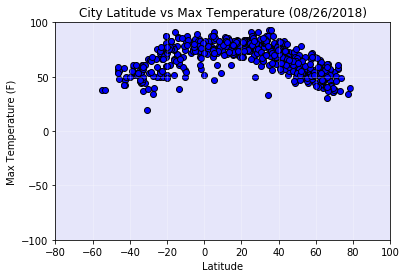

In [15]:
#Scatter plot for Temperature (F) vs. Latitude

plt.scatter([Lat],[Temperature], marker="o", color = 'blue', edgecolors = "black")

plt.title("City Latitude vs Max Temperature (08/26/2018)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-100, 150, 50))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True, color ="w", alpha = 0.3)
plt.rcParams['axes.facecolor'] = "lavender"
plt.savefig("RandomWorldCitiesTemperature.png")

plt.show()

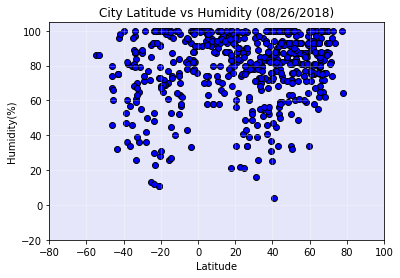

In [16]:
#Scatter plot for Humidity (F) vs. Latitude
plt.scatter([Lat],[Humidity], marker="o", color = 'blue', edgecolors = "black")

plt.title("City Latitude vs Humidity (08/26/2018)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-20, 120, 20))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True, color ="w", alpha = 0.3)
plt.rcParams['axes.facecolor'] = "lavender"
plt.savefig("RandomWorldCitiesHumidity.png")

plt.show()

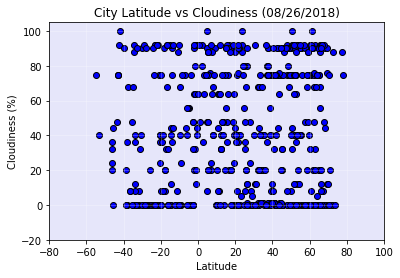

In [17]:
#Scatter plot for Cloudiness (F) vs. Latitude
plt.scatter([Lat],[Cloudiness], marker= "o", color = 'blue',edgecolors = "black")

plt.title("City Latitude vs Cloudiness (08/26/2018)" )
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True, color ="w", alpha = 0.3)
plt.yticks(np.arange(-20, 120, 20))
plt.xticks(np.arange(-80, 120, 20))
plt.rcParams['axes.facecolor'] = "lavender"
plt.savefig("RandomWorldCitiesCloudiness.png")

plt.show()

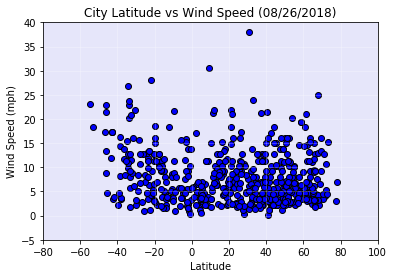

In [18]:
#Scatter plot for Windspeed (F) vs. Latitude
plt.scatter([Lat],[Windspeed], marker="o", color = 'blue', edgecolors = "black")

plt.title("City Latitude vs Wind Speed (08/26/2018)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.yticks(np.arange(-5, 45, 5))
plt.xticks(np.arange(-80, 120, 20))
plt.grid(True, color ="w", alpha = 0.3)
plt.rcParams['axes.facecolor'] = "lavender"
plt.savefig("RandomWorldCitiesWindSpeed.png")

plt.show()